<a href="https://colab.research.google.com/github/gerardcalabrese/HCSPD2024/blob/main/Ejercicio1_RLC_Octave_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución simbólica en un circuito RLC

Se resuelve la ecuacion diferencial del circuito RLC de la figura.

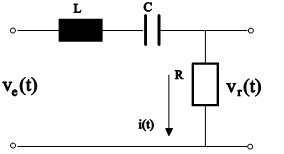

Las ecuaciones son
<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
\frac{di(t)}{dt}=-\frac{R}{L}i(t)-\frac{1}{L}v_c(t) + \frac{1}{L}v_e(t)  \\
\frac{dv_c(t)}{dt}=\frac{1}{C}i(t)
\end{cases}
\end{equation*} \tag*{}$

con las condiciones iniciales nulas para la corriente $i(0)=0$ y la tensión del capacitor $v_c(0)=0$.

## Instalación de Octave en el entorno Colab
Se instala el programa Octave, y las librerías necesarias.

In [ ]:
# !apt-get update #Usar para actualizar librerias, únicamente

In [ ]:
!apt install octave #Instala colab en el entorno de trabajo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aglfn default-jre-headless epstool fonts-droid-fallback fonts-freefont-otf fonts-noto-mono
  fonts-urw-base35 ghostscript gnuplot-data gnuplot-qt gsfonts imagemagick-6-common info
  install-info libamd2 libauthen-sasl-perl libbtf1 libcamd2 libccolamd2 libcholmod3 libclone-perl
  libcolamd2 libcombblas1.16.0 libcxsparse3 libdata-dump-perl libemf1 libencode-locale-perl
  libevdev2 libfftw3-double3 libfftw3-long3 libfftw3-mpi3 libfftw3-single3 libfile-listing-perl
  libfltk-gl1.3 libfltk1.3 libfont-afm-perl libglpk40 libglu1-mesa libgraphicsmagick++-q16-12
  libgraphicsmagick-q16-3 libgs9 libgs9-common libgudev-1.0-0 libhdf5-openmpi-103-1
  libhtml-form-perl libhtml-format-perl libhtml-parser-perl libhtml-tagset-perl libhtml-tree-perl
  libhttp-cookies-perl libhttp-daemon-perl libhttp-date-perl libhttp-message-perl
  libhttp-negotiate-perl

In [ ]:
# https://gnu-octave.github.io/packages/
# https://github.com/gnu-octave/symbolic
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
The following additional packages will be installed:
  libimagequant0 libraqm0 mailcap mime-support python3-mpmath python3-numpy python3-olefile
  python3-pil
Suggested packages:
  python-mpmath-doc python3-gmpy2 python3-matplotlib python-numpy-doc python3-pytest python-pil-doc
  texlive-fonts-extra dvipng python-sympy-doc
The following NEW packages will be installed:
  libimagequant0 libraqm0 mailcap mime-support python3-mpmath python3-numpy python3-olefile
  python3-pil python3-sympy
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,725 kB of archives.
After this operation, 54.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libimagequant0 amd64 2.17.0-1 [34.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libraqm0 amd64 0.7.0-4ubuntu1 [11.7 kB]
Get:3

In [ ]:
%%writefile Inst_S.m
pkg install -forge symbolic

Writing Inst_S.m


In [ ]:
!octave -W Inst_S.m #  corre el código adentro de Octave pkg install -forge symbolic

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


In [ ]:
!pip install --user sympy==1.5.1 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cudnn-cu12==8.

Se debe agregar en el .m el path donde está el Python, mediante una línea como ésta:

---


**setenv PYTHON /usr/local/bin/python**


---


para acceder al sympy desde symbolic. No obtante, puede ser diferente el path y debe verificarse en caso de que no funcione.


In [ ]:
%%writefile RLC_Escalon_Simbolico.m
clear all; clc; % borra toda variable anterior
setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic, lo que esta en la celda 6
%/usr/bin/python
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python. Esto lo pide el Octave instalado también

%Inicializo los parametros dados
R=1;L=1;C=1; Ve = 12

%Defino funciones simbolicas, corriente y voltaje del capacitor
syms ii(t) vc(t)

%defino como primera ecuación que la derivada de Vc es igual a i/c
ode1=diff(vc)==ii/C
%defino como segunda ecuación que la derivada segunda de Vc es igual a ..
ode2=diff(ii)==-(R/L)*ii-(1/L)*vc+(1/L)*heaviside(0)

%Defino condiciones iniciales para cada funcion simbolica
cond1 = ii(0) == 0;
cond2 = vc(0) == 0;

%Creo un arreglo con las condiciones y funciones
conds = [cond1;cond2];
odes = [ode1; ode2];

%Llamo a la funcion para resolver las ecuaciones simbolicas de segundo orden lineales
Sol=dsolve(odes,cond1,cond2);

%Sol es un "struct", para acceder a la solución de datos corriente y voltaje hago:
Corriente=simplify(Sol.ii)
Tension=simplify(Sol.vc)

T = 0:0.1:3
i_plot = double(subs(Corriente,t,T))
vc_plot = double(subs(Tension,t,T))

subplot(211)
plot(T,i_plot,'--')
xlabel('tiempo [s]')
ylabel('corriente [A]')
subplot(212)
plot(T,vc_plot,'--')
xlabel('tiempo [s]')
ylabel('Voltaje capacitor [v]')

print -dpng Ejercicio1.png;

Writing RLC_Escalon_Simbolico.m


Luego de generar el archivo .m en el entorno, se puede ejecutar al Octave con los comandos de línea.

In [ ]:
!octave -W RLC_Escalon_Simbolico.m # -W : no window system

Ve = 12
Symbolic pkg v3.1.1: Python communication link active, SymPy v1.5.1.
ode1 = (sym)

  d                
  ──(vc(t)) = ii(t)
  dt               

    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    plus at line 53 column 5
    plus at line 61 column 5
    RLC_Escalon_Simbolico at line 15 column 5

ode2 = (sym)

  d                               
  ──(ii(t)) = -ii(t) - vc(t) + 1/2
  dt                              

Corriente = (sym)

      -t           
      ───          
       2     ⎛√3⋅t⎞
  √3⋅ℯ   ⋅sin⎜────⎟
             ⎝ 2  ⎠
  ─────────────────
          3        

Tension = (sym)

          -t               
          ───              
           2     ⎛√3⋅t   π⎞
      √3⋅ℯ   ⋅sin⎜──── + ─⎟
  1              ⎝ 2     3⎠
  ─ - ─────────────────────
  2             3          

T =

 Columns 1 through 8:

         0    0.1000    0.2000    0.3000    0.4000    0.5000    0.6000    0.7000

 Columns 9 through 16:

    0.8000    0.9000    1.0000    1.1

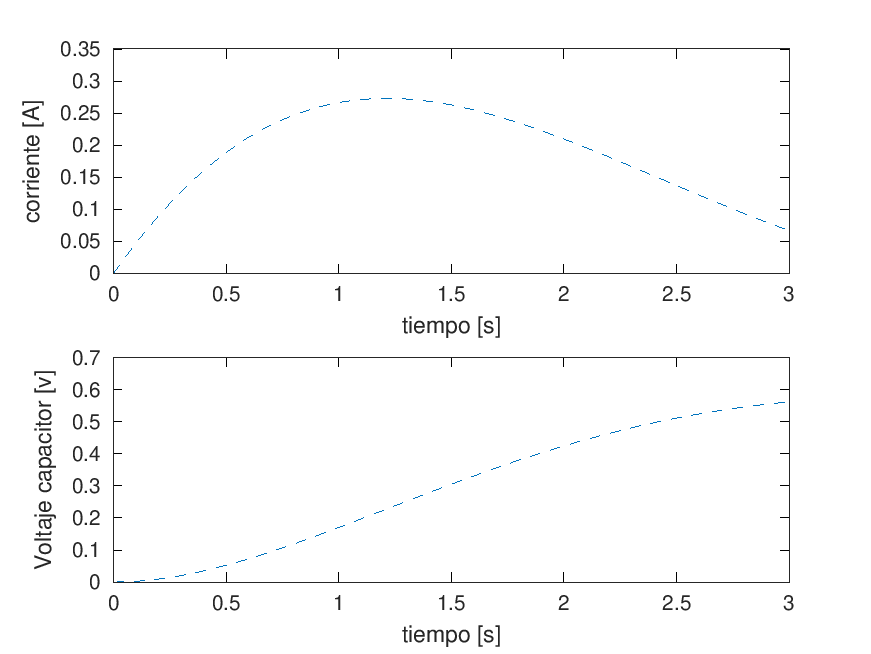

In [ ]:
from IPython import display
display.Image('Ejercicio1.png')

# Verificación numérica

Queda como tarea completar el script siguiente para verificar las soluciones obtenidas analíticamente.

In [ ]:
%%writefile Euler_RLC.m
%Funcion modelo
function [X]= Euler_RLC(R,L,C,escalon,tiempo_fin)
A=[-R/L, -1/L;1/C,0];B=[1/L;0];%
avalor = eig(A)
% 1./ans
if iscomplex(avalor(1)):
  h= 1e-7
endif

u = escalon
x(1) = [0,0]
for ii=2:tiempo_fin/h
xp(ii)=A*x+B*u;
x(ii)=x(ii-1)+xp(ii)*h;
end
X=[x];%x1 corriente, x2 tensión

Writing Euler_RLC.m


In [ ]:
%%writefile Test.m

 R=0.00658;L=4.32e-8;C=1;
 A=[-R/L, -1/L;1/C,0];B=[1/L;0];
 u = L
 b= B*u
 h = 1e-7
X(:,1) =[0;0];
 for n = 1: 6e5 -1
   Xp(:,n) = A*X(:,n)+b;
   X(:,n+1) = X(:,n)+Xp(:,n)*h;
 endfor
 subplot(211)
 plot(X(1,:))
 title('corriente')
 subplot(212)
 plot(X(2,:))
 title('Tension')

 print -dpng Integral_numerica.png;

Overwriting Test.m


In [ ]:
!octave -W Test.m # -W : no window system

u = 4.3200e-08
b =

   1
   0

h = 1.0000e-07


In [ ]:
from IPython import display
display.Image('Integral_numerica.png')

FileNotFoundError: No such file or directory: 'Integral_numerica.png'

FileNotFoundError: No such file or directory: 'Integral_numerica.png'

<IPython.core.display.Image object>

In [ ]:
function [X]= Euler_RLC(R,L,C,escalon,tiempo_fin)
A=[-R/L, -1/L;1/C,0]
B=[1/L;0]
avalor = eig(A)

if iscomplex(avalor(1))
  h1 = 10^(-2)
  tau = tiempo_fin
else
  tR = log(0.95)/avalor(1)
  primer_elevado =-floor(log10(abs(tR)));
  primera_sig = fix(tR*10.^primer_elevado);
  h1 = primera_sig * 10^-primer_elevado

  tL = log(0.05)/avalor(2)
  tau = 4*tL

  segundo_elevado =-floor(log10(abs(tL)));
  segundo_sig = fix(tL*10.^segundo_elevado);
  h2 = segundo_sig * 10^-segundo_elevado;
endif

u = escalon
X(:,1) = [0;0]
xante = [0;0]
n = 1
for t= 0+h1:h1:tau
   n = n+1;
   for m=1:t/h1
      xp=A*xante+B*u;
      xante=xante+xp*h1;
   endfor
   X(:,n) = xante;
endfor
X=[x];%x1 corriente, x2 tensión
endfunction

In [ ]:
%%writefile Verificacion_Num.m
clc;clear all; %Pongo todas las variables en cero
warning('off','all');
X(0)=-[0; 0];ii=0;t_etapa=1e-8;wRef=2;tF=1e-3;
color_='r';
color='b';
Ts=t_etapa;
%A1=((2*Kp*Ts)+(Ki*(Ts^2))+(2*Kd))/(2*Ts);
%B1=(-2*Kp*Ts+Ki*(Ts^2)-4*Kd)/(2*Ts);
%C1=Kd/Ts;
%e=zeros(round(tF/t_etapa),1);
u=0;TL=1.15e-4;u=12;
%graphics_toolkit("gnuplot"); %No aconsejado
%graphics_toolkit("fltk");
%graphics_toolkit("qt"); %Aconsejado
% x1(1)=X(1);%corriente
% x2(2)=X(2);%tensión en el capacitor
for t=0:t_etapa:tF
  ii=ii+1;k=ii+2;
  x1(ii)=X(1);%corriente
  x2(ii)=X(2);%tensión en el capacitor
  X=modrlc(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x1,color_);title('x_1 corriente'); hold on;
%plot(t,x1_analitica,color);title('x_1 corriente'); hold on;
subplot(3,1,2);hold on;
plot(t,x2,color_);title('x_2 Vc_t');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
%figure(1)
%figure(2)
print(hfig1,'Vars_temporal','-r300','-dpng');
save('Verificacion_Num_1.mat','-v7');

Writing Verificacion_Num.m


In [ ]:
# -W : no window system
!octave -W Verificacion_Num.m
import scipy.io
mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

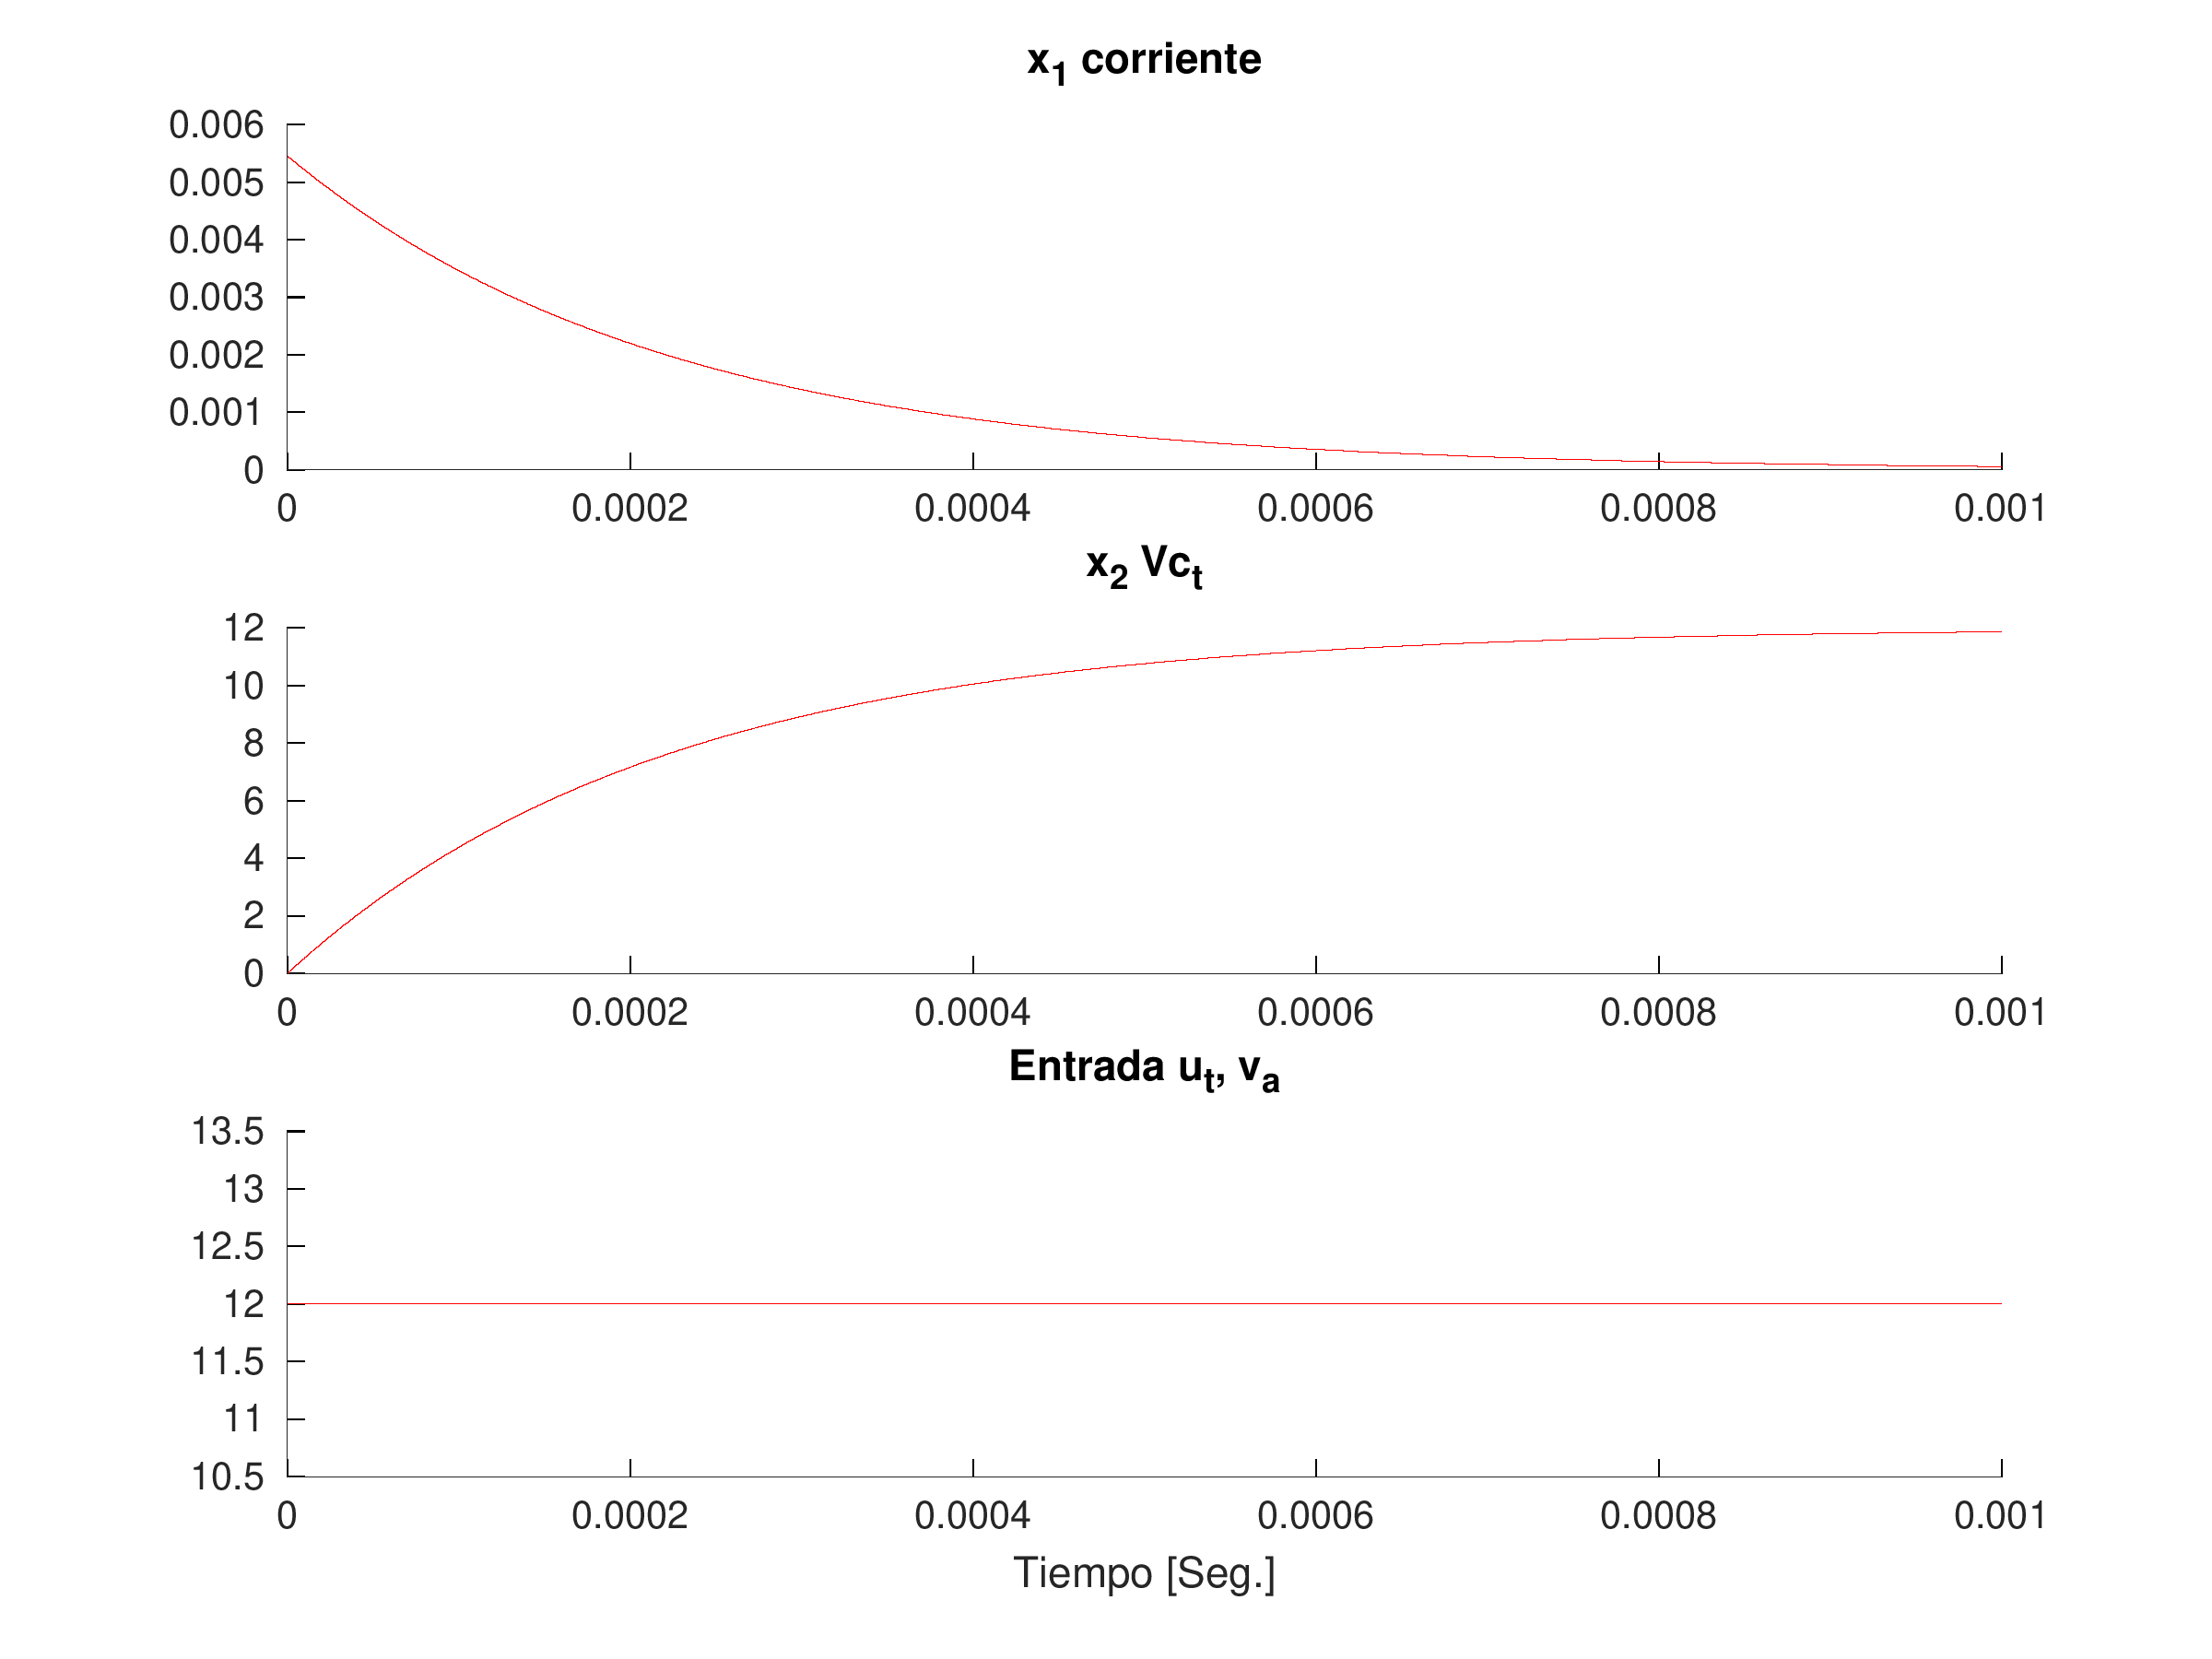

In [ ]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt

In [ ]:
from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
drive.mount('/content/drive')

In [ ]:
# !cp Vars_temporal.png /content/drive/MyDrive/CursoHCSPD2024 #Copia uno por uno
import os
import shutil
fnames = ['Vars_temporal.png','Calculo_RLC_Simbolico.m','Verificacion_Num.m','Verificacion_Num_1.mat','modrlc.m'] #Acá van los nombres de los archivos que desean copiarse al Gdrive
for fname in fnames:
  src = os.path.join('/content', fname)
  dst = os.path.join('/content/drive/MyDrive/CursoHCSPD2024', fname)
  shutil.copyfile(src, dst)

# Simulación numérica del avión
Se realiza la simulación por Euler del modelo simplificado del avión
$\dot{\alpha}=a\cdot (\phi-\alpha)$, $\ddot \phi=-\omega^2\cdot(\phi-\alpha-b\cdot u_t)$, $\dot h=c\cdot \alpha.$

In [ ]:
%%writefile Avion_Num.m
clc;clear all;
warning('off','all');
X=-[0; 0;0;0];t_etapa=10e-3;
tF=5;
color_='r';
color='b';
Ts=t_etapa;
u=1;
ii=0;
for t=0:t_etapa:tF
  ii=ii+1;
  x2(ii)=X(2);%Ángulo fi
  x4(ii)=X(4);%tensión en el capacitor
  X=modavion(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x2,color_);title('x_2 angulo fi'); hold on;
%plot(t,x1_analitica,color);title('x_1 corriente'); hold on;
subplot(3,1,2);hold on;
plot(t,x4,color_);title('x_4 Altura');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
%figure(1)
%figure(2)
print(hfig1,'VarsAvion_temporal','-r300','-dpng');
save('Verificacion_Num_1Avion.mat','-v7');

Overwriting Avion_Num.m


In [ ]:
%%writefile modavion.m
%Funcion modelo
function [X]=modavion(t_etapa, xant, accion)
%xant=[alfa,fi,fi_p,h]
a=0.01; b=2; c=100;
omega=0.2;
At=1e-3;
u=accion;
%xant=[alfa,fi,fi_p,h]
alfa=xant(1);
fi=xant(2);
fi_p=xant(3);
h=xant(4);
x=xant;
for ii=1:t_etapa/At
  %xp=A*x+B*u;
  alfa_p=a*(fi-alfa);
  fi_pp=(-omega^2)*(fi-alfa-b*u);
  h_p=c*alfa;
  xp=[alfa_p;fi_p;fi_pp;h_p];
  x=x+xp*At;
  fi_p=xp(2);
  alfa=x(1);
  fi=x(2);
  fi_p=x(3);
  h=x(4);
end
X=[x]; %

Writing modavion.m


In [ ]:
# -W : no window system
!octave -W Avion_Num.m
# import scipy.io
# mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

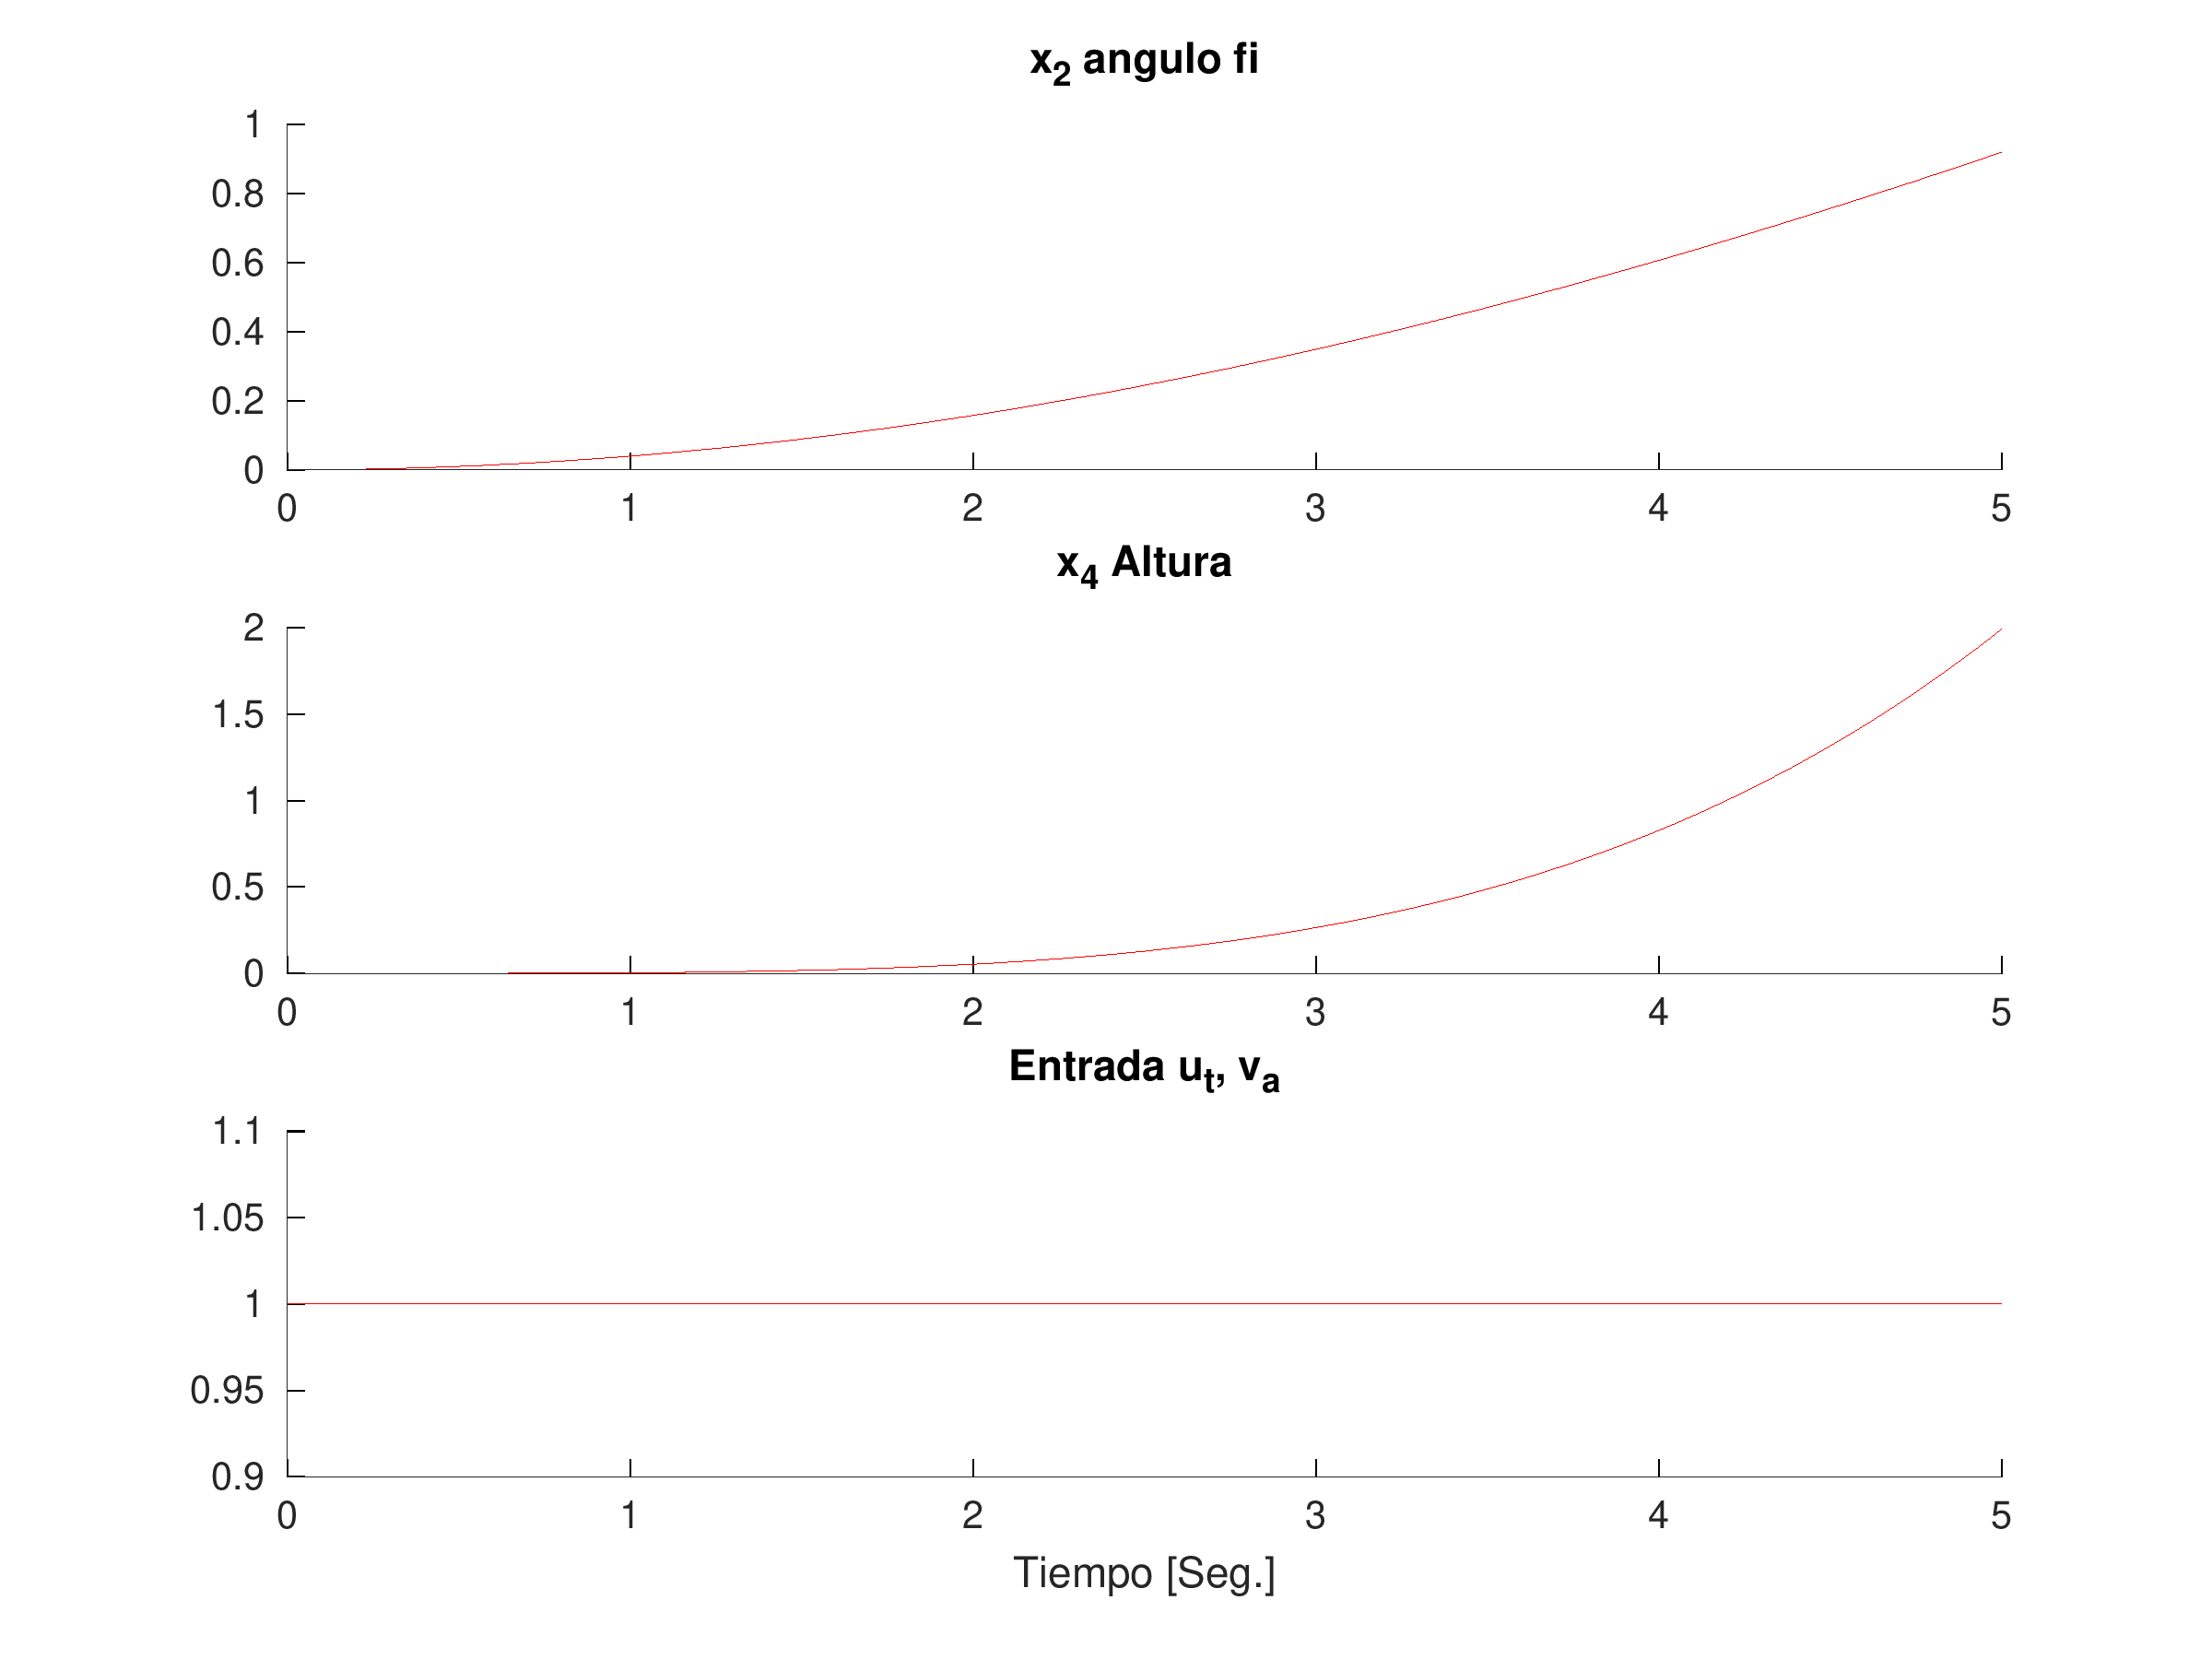

In [ ]:
from PIL import Image
imt = Image.open("/content/VarsAvion_temporal.png")
imt

# Cierre
Para guardar todos los archivos y las imágenes generadas en el Gdrive, se puede proceder mediante el montado en el entorno de trabajo, y luego copiar todo mediante Python. Con la instrucción de Linux `!cp archivo dir_destino` se puede copiar uno por uno todos los archivos.

In [ ]:
from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp Vars_temporal.png /content/drive/MyDrive/CursoHCSPD2024 #Copia uno por uno
import os
import shutil
fnames = ['VarsAvion_temporal.png','Verificacion_Num_1Avion.mat','Avion_Num.m','modavion.m'] #Acá van los nombres de los archivos que desean copiarse al Gdrive
for fname in fnames:
  src = os.path.join('/content', fname)
  dst = os.path.join('/content/drive/MyDrive/CursoHCSPD2024', fname)
  shutil.copyfile(src, dst)